<a href="https://colab.research.google.com/github/catafest/colab_google/blob/master/catafest_072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disable Jupyter widgets metadata to avoid GitHub rendering errors

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import os
os.environ["COLAB_DISABLE_WIDGETS"] = "1"

import glob
import json

# The user has indicated they do NOT want to link Colab to Drive.
# Therefore, we will only look for the notebook directly in the /content/ directory.
# files = glob.glob("/content/*.ipynb") # Original line

# The notebook is in Google Drive, and the path is now corrected.
path = '/content/drive/MyDrive/Colab Notebooks/catafest_072.ipynb'

print("Cleaning notebook:", path)

# ============================================================
# Load the notebook JSON
# ============================================================
with open(path, "r", encoding="utf-8") as f:
    nb = json.load(f)

# ============================================================
# Remove global widget metadata
# ============================================================
if "widgets" in nb.get("metadata", {}):
    del nb["metadata"]["widgets"]

# ============================================================
# Remove widget metadata from each cell
# ============================================================
for cell in nb.get("cells", []):
    if "metadata" in cell and "widgets" in cell["metadata"]:
        del cell["metadata"]["widgets"]

# ============================================================
# Save the cleaned notebook
# ============================================================
with open(path, "w", encoding="utf-8") as f:
    json.dump(nb, f, indent=2)

print("Notebook cleaned successfully.")
print("IMPORTANT: Download this notebook (`File > Download .ipynb`) and reopen it locally or upload to GitHub.")
print("Files in /content/ are temporary and will be lost when the Colab session ends.")


Cleaning notebook: /content/drive/MyDrive/Colab Notebooks/catafest_072.ipynb
Notebook cleaned successfully.
IMPORTANT: Download this notebook (`File > Download .ipynb`) and reopen it locally or upload to GitHub.
Files in /content/ are temporary and will be lost when the Colab session ends.


This Colab notebook has been developed to provide an interactive interface for text-to-image generation

In [ ]:
# dependențe
!pip install diffusers transformers accelerate safetensors torch --quiet
# show GPU
!nvidia-smi


Thu Jan  1 15:36:12 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P0             32W /   70W |    4354MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# testing with python torch
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

True
Tesla T4


In [ ]:
# Import libraries and load the Stable Diffusion model

from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

# Detect device (GPU if available, else CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Model used in the article: Stable Diffusion v1.4
model_id = "CompVis/stable-diffusion-v1-4"

# Load the pipeline with half-precision (FP16) for better GPU performance
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None  # disable safety checker for faster inference
).to(device)

# Enable memory optimization
pipe.enable_attention_slicing()

Using device: cuda


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/30 [00:00<?, ?it/s]

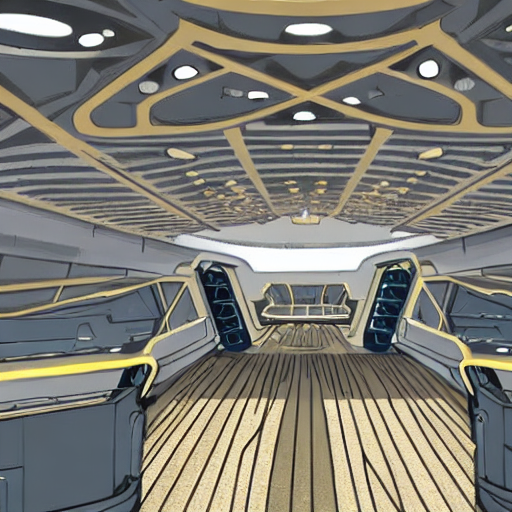

In [ ]:
# Generate an image from a text prompt
# You can change this prompt to anything you want
prompt = "ship scifi interior deck, no people"

# num_inference_steps → more steps = higher quality (but slower)
# guidance_scale      → how strongly the model follows the prompt
result = pipe(
    prompt,
    num_inference_steps=30,
    guidance_scale=7.5
)

# Extract the generated image
image = result.images[0]

# Display the image directly in Colab
image

In [ ]:
# Save the generated image

output_path = "generated_image.png"
image.save(output_path)

print(f"Image saved as {output_path}")

Image saved as generated_image.png


In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
from ipywidgets import Textarea, Button, Output
from IPython.display import display

# Detect device (GPU if available, else CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Model used in the article: Stable Diffusion v1.4
model_id = "CompVis/stable-diffusion-v1-4"

# Load the pipeline with half-precision (FP16) for better GPU performance
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None  # disable safety checker for faster inference
).to(device)

# Enable memory optimization
pipe.enable_attention_slicing()


Using device: cuda


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
from ipywidgets import Textarea, Button, Output
from IPython.display import display

# Detect device (GPU if available, else CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Model used in the article: Stable Diffusion v1.4
model_id = "CompVis/stable-diffusion-v1-4"

# Load the pipeline with half-precision (FP16) for better GPU performance
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None  # disable safety checker for faster inference
).to(device)

# Enable memory optimization
pipe.enable_attention_slicing()


Using device: cuda


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
from ipywidgets import Textarea, Button, Output, IntSlider
from IPython.display import display, Image as IPImage

# Create widgets
prompt_input = Textarea(
    value='a view of rare beauty with fireworks that write the text in the air: "Happy New Year 2026" in honor of the transition to the new year 2026',
    placeholder='Enter your prompt here',
    description='Prompt:',
    disabled=False,
    layout={'height': '100px', 'width': '500px'}
)

num_inference_steps_slider = IntSlider(
    value=30,
    min=10,
    max=100,
    step=5,
    description='Inference Steps:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

generate_button = Button(description='Generate Image')
output_area = Output()

def generate_image_on_click(b):
    with output_area:
        output_area.clear_output()
        print("Generating image...")
        try:
            # num_inference_steps -> more steps = higher quality (but slower)
            # guidance_scale      -> how strongly the model follows the prompt
            result = pipe(
                prompt_input.value,
                num_inference_steps=num_inference_steps_slider.value,
                guidance_scale=7.5
            )

            # Extract the generated image
            image = result.images[0]

            # Save the image to a temporary buffer or file to display it
            image.save('generated_interactive_image.png')
            display(IPImage('generated_interactive_image.png'))
            print("Image generated successfully!")
        except Exception as e:
            print(f"An error occurred: {e}")

# Link the button to the generation function
generate_button.on_click(generate_image_on_click)

# Display the widgets
display(prompt_input, num_inference_steps_slider, generate_button, output_area)

Textarea(value='a view of rare beauty with fireworks that write the text in the air: "Happy New Year 2026" in …

IntSlider(value=30, continuous_update=False, description='Inference Steps:', min=10, step=5)

Button(description='Generate Image', style=ButtonStyle())

Output()